# Financial Analysis - Analyzing Time Series
In this notebook I would use ARMA for analyzing financial data. I implemented what I learn from datacamp: Time Series Analysis in Python. 

Source of data : https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI


In [1]:
#IMPORT LIBRARY
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
DJI=pd.read_csv('DJOW.csv')
DJI.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-26,17859.519531,17888.660156,17803.820313,17828.289063,17828.289063,68940000
1,2016-05-27,17826.849609,17873.220703,17824.730469,17873.220703,17873.220703,73190000
2,2016-05-31,17891.500000,17899.240234,17724.029297,17787.199219,17787.199219,147390000
3,2016-06-01,17754.550781,17809.179688,17664.789063,17789.669922,17789.669922,78530000
4,2016-06-02,17789.050781,17838.560547,17703.550781,17838.560547,17838.560547,75560000


In [3]:
DJI['Return']=DJI['Close'].pct_change()

In [4]:
DJI=DJI.dropna()

# Normality - Investment Risk
Financial data known tend not to be normally distributed. The return usually have high kurtosis and positive skewness which means the mass of the distribution is concentrated on the left. Variance represent as votality, the higher the variance means higher risk investment. Variance also measure the dispersion of the returns. 

The Null Hypothesis by Shapiro-Wilk test data are normally distributed or not by looking at the p-value. If the p_value < 0.5 the hypotesis will be rejected and the data are most likely non-normal.

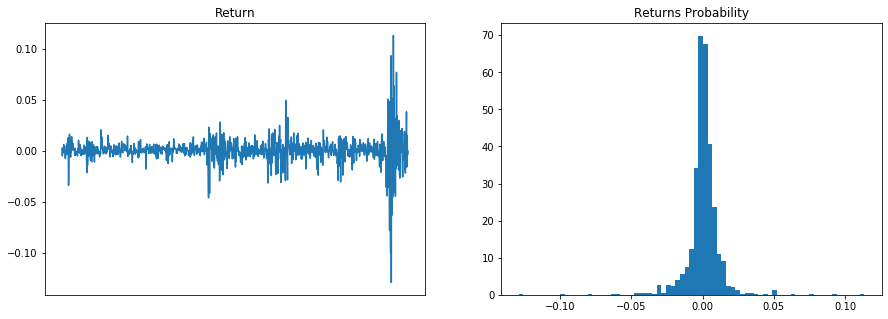

Daily Return Mean :0.0003997766481079971
Standard Deviation :0.01295305307485013
Skewness :-0.6338100052801323
Kurtosis :26.265745971439628
Null hypotesis of normality is rejected.


In [5]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
#plt.subplots(2,2,1)
ax1.plot(DJI['Date'],DJI['Return'])
ax1.set_title('Return')
ax1.xaxis.set_visible(False)
ax2.hist(DJI['Return'],bins=75,density=True)
ax2.set_title('Returns Probability')
plt.show()

from scipy.stats import skew,kurtosis
print('Daily Return Mean :'+str(np.mean(DJI['Return'])))
print('Standard Deviation :'+str(np.std(DJI['Return'])))
print('Skewness :'+str(skew(DJI['Return'])))
print('Kurtosis :'+str(kurtosis(DJI['Return'])))

p_value=stats.shapiro(DJI['Return'])[1]
if p_value<=0.05:
    print('Null hypotesis of normality is rejected.')
else:
    print('Null hypotesis of normality is accepted.')


# Autocorrelation Function
We will compare if the return has the same property as white noise. White noise is a series with constant mean, constant variance, and zero autocorrelations at all lags. Alpha shows the confidence of interval in data. Fewer the obserevation the bigger the confidence band.


Text(0.5, 1.0, 'Returns')

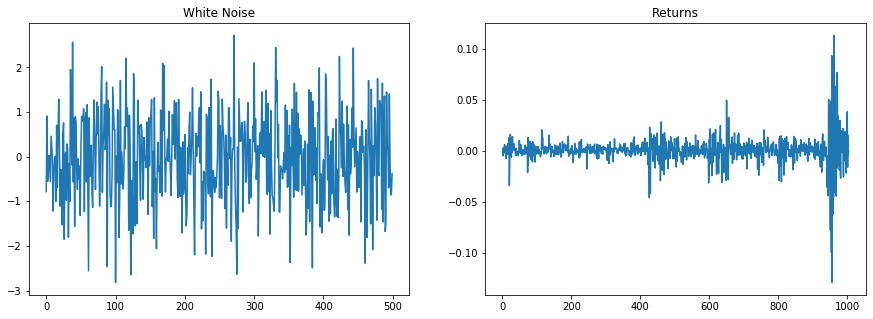

In [6]:
#Autocrrelation White Noise and Returns
noise=np.random.normal(loc=0,scale=1,size=500)

f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
#plt.subplots(2,2,1)
ax1.plot(noise)
ax1.set_title('White Noise')
#plt.subplots(2,2,2)
ax2.plot(DJI['Return'])
ax2.set_title('Returns')

By seeing the autocorrelation plot the stock market return does not show close to the white noise. 

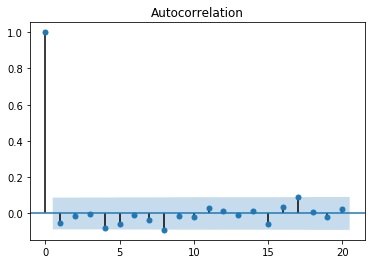

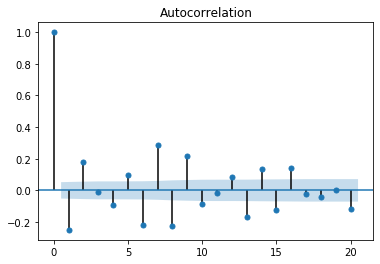

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
noise_acf=plot_acf(noise,lags=20,alpha=0.05)
return_acf=plot_acf(DJI['Return'],lags=20,alpha=0.1)

# Stationary
Stationary of the financial data is important. Strong stationarity means the entire distribution of data is time-invariant while weak stationarity means that the mean, variance and autocorrelation are time-invariant. If the parameter is changing with time, the model will have too many parameters to estimate. Therefore, it will be best if we make the data become stationary first by taking the first difference of the data.

Checking the stationary data using dickey-fuller test. The Augmented Dickey-Fuller test is one of the type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [11]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(DJI['Return'])
print('p-value :'+str(results[1]))

p-value :8.736281326917744e-12


Since the data is non-stationary we will transform the data

Text(0.5, 1.0, 'DJI Diff')

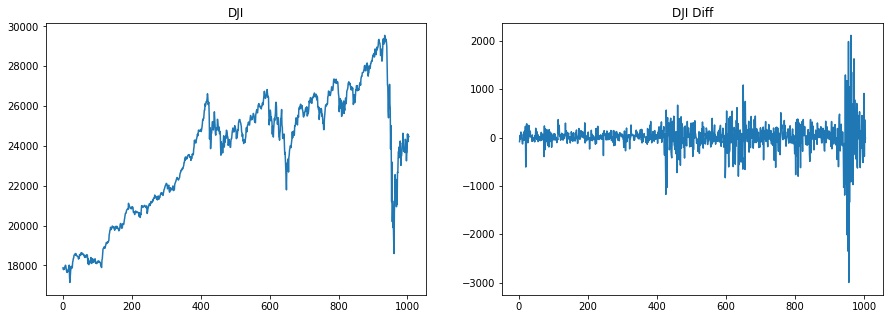

In [12]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
#plt.subplots(2,2,1)
ax1.plot(DJI['Adj Close'])
ax1.set_title('DJI')
#plt.subplots(2,2,2)
ax2.plot(DJI['Adj Close'].diff())
ax2.set_title('DJI Diff')

# ARMA
AR stands for autoregressive moving average, a statistical model to predict the future value based on past value.

R(t)= mean + ARparameter*R(t-1) + drift

Negative AR parameter means mean reversion and positive AR parameter means momentum. AR Model could have higher model with more ARparameter will be included. To identify the order of an AR model we could use two techniques:
1. Partial Autocorrelation Function
2. Information Criteria 

In this part I will use Information Criteria. To adjust goodness-of-fit for number of parameters, usually use Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC). To get the AIC and BIC take a look at the summary. We want to use the smallest number of BIC.

In [14]:
#INFORMATION CRITERIA
from statsmodels.tsa.arima_model import ARMA
mod=ARMA(DJI['Return'],order=(1,0))
resAR1=mod.fit()
print(resAR1.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Return   No. Observations:                 1004
Model:                     ARMA(1, 0)   Log Likelihood                2971.609
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sun, 07 Jun 2020   AIC                          -5937.218
Time:                        12:24:17   BIC                          -5922.483
Sample:                             0   HQIC                         -5931.618
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      1.261      0.207      -0.000       0.001
ar.L1.Return    -0.2499      0.031     -8.184      0.000      -0.310      -0.190
                                    Roots   

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An 

Text(0.5, 1.0, 'Bayesian Information Criterion')

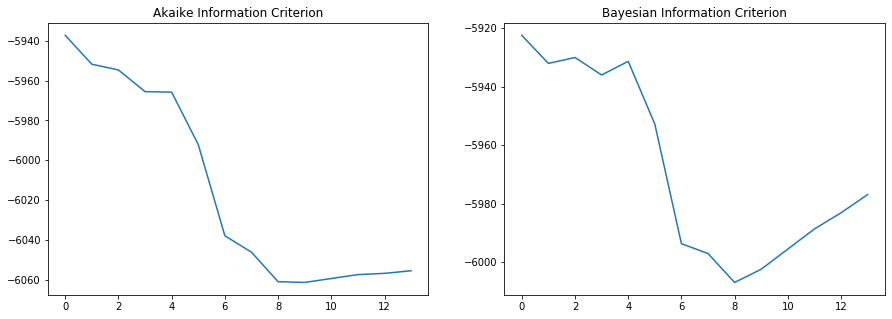

In [29]:
resaic=[]
resbic=[]
for i in range(1,15):
    mod=ARMA(DJI['Return'],order=(i,0))
    res=mod.fit()
    resaic.append(res.aic)
    resbic.append(res.bic)
    
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(resaic)
ax1.set_title('Akaike Information Criterion')
ax2.plot(resbic)
ax2.set_title('Bayesian Information Criterion')

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


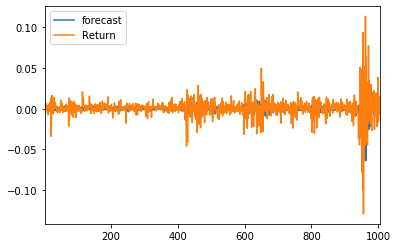

In [36]:
mod=ARMA(DJI['Return'],order=(8,0))
res=mod.fit()
res.plot_predict()
plt.show()